<a href="https://colab.research.google.com/github/iamabd53/Mobile-Price-Range-Prediction/blob/main/Mobile_Price_Range_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Problem Statement**

***In the competitive mobile phone market companies want
to understand sales data of mobile phones and factors which drive the prices.
The objective is to find out some relation between features of a mobile phone(eg:- RAM,
Internal Memory, etc) and its selling price. In this problem, we do not have to predict the
actual price but a price range indicating how high the price is.***

Data Description -
*  Battery_power - Total energy a battery can store in one time measured in mAh
*  Blue - Has bluetooth or not
*  Clock_speed - speed at which microprocessor executes instructions
*  Dual_sim - Has dual sim support or not
*  Fc - Front Camera mega pixels
*  Four_g - Has 4G or not
*  Int_memory - Internal Memory in Gigabytes
*  M_dep - Mobile Depth in cm
*  Mobile_wt - Weight of mobile phone
*  N_cores - Number of cores of processor
*  Pc - Primary Camera mega pixels
*  Px_heig
   Px_height - Pixel Resolution Height

   Px_width - Pixel Resolution Width

   Ram - Random Access Memory in Mega Bytes

   Sc_h - Screen Height of mobile in cm

   Sc_w - Screen Width of mobile in cm

   Talk_time - longest time that a single battery charge will last

   Three_g - Has 3G or not

   Touch_screen - Has touch screen or not

   Wifi - Has wifi or not

   Price_range - This is the target variable with value of 0(low cost), 1       (medium cost),
   2(high cost) and 3(very high cost).

### **Import and installing models**

In [68]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# import lime
# import lime.lime_tabular
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble  import  BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble  import  VotingClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.svm import SVC
import xgboost
from sklearn.ensemble import StackingClassifier


In [69]:
!pip3 install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [70]:
# !pip3 install lime
# !pip3 install xgboost
# !pip3 install pandas_profiling --upgrade

In [71]:
df = pd.read_csv('/content/drive/MyDrive/ML project ALMA better/data_mobile_price_range.csv')

### **Defination**

In [72]:
def ML(model):

  model.fit(X_train_scaled,y_train)
  y_pred_train = model.predict(X_train_scaled)
  y_pred_test = model.predict(X_test_scaled)

  # Mean cross val score

  from sklearn.model_selection import cross_val_score
  scores = cross_val_score(model,X_scaled, y, scoring = 'accuracy', cv = 5)
  print(f'cv_mean_score={np.mean(scores)}')

  print(f'\n')

  # Cross validate

  from sklearn.model_selection import cross_validate
  scores = cross_validate(model,X_scaled, y, scoring = 'accuracy', cv = 5, return_train_score=True,return_estimator=True,verbose = 10)
  print(f'Cross validate scores={scores}')

  print(f'\n')
  # Class

  #print(f'Model classes = {model.classes_}')

  # Classification Report
  print(f'\n')

  from sklearn.metrics import classification_report
  print(f'Classification Report = \n {classification_report(y_pred_test, y_test)}')

### **Data Description**

In [73]:
cat_df = df[['blue','dual_sim','four_g','three_g','touch_screen','wifi']]
num_df = df[['battery_power','clock_speed', 'fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']]

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [75]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [76]:
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [77]:
df.shape

(2000, 21)

In [78]:
df.corr()['price_range']

battery_power    0.200723
blue             0.020573
clock_speed     -0.006606
dual_sim         0.017444
fc               0.021998
four_g           0.014772
int_memory       0.044435
m_dep            0.000853
mobile_wt       -0.030302
n_cores          0.004399
pc               0.033599
px_height        0.148858
px_width         0.165818
ram              0.917046
sc_h             0.022986
sc_w             0.038711
talk_time        0.021859
three_g          0.023611
touch_screen    -0.030411
wifi             0.018785
price_range      1.000000
Name: price_range, dtype: float64

In [79]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

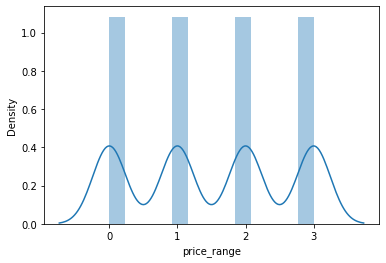

In [80]:
sns.distplot(df['price_range'])

## **EDA**

In [81]:
# from pandas_profiling import ProfileReport
# prof = ProfileReport(df)
# prof.to_file(output_file = 'output.html')

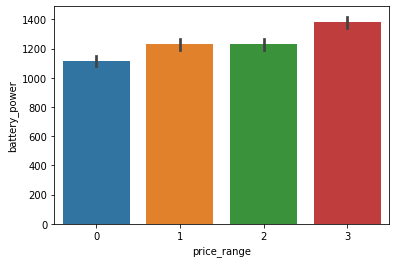

In [82]:
sns.barplot(x=df['price_range'],y=df['battery_power'])
plt.xticks(rotation = 'horizontal')
plt.show()

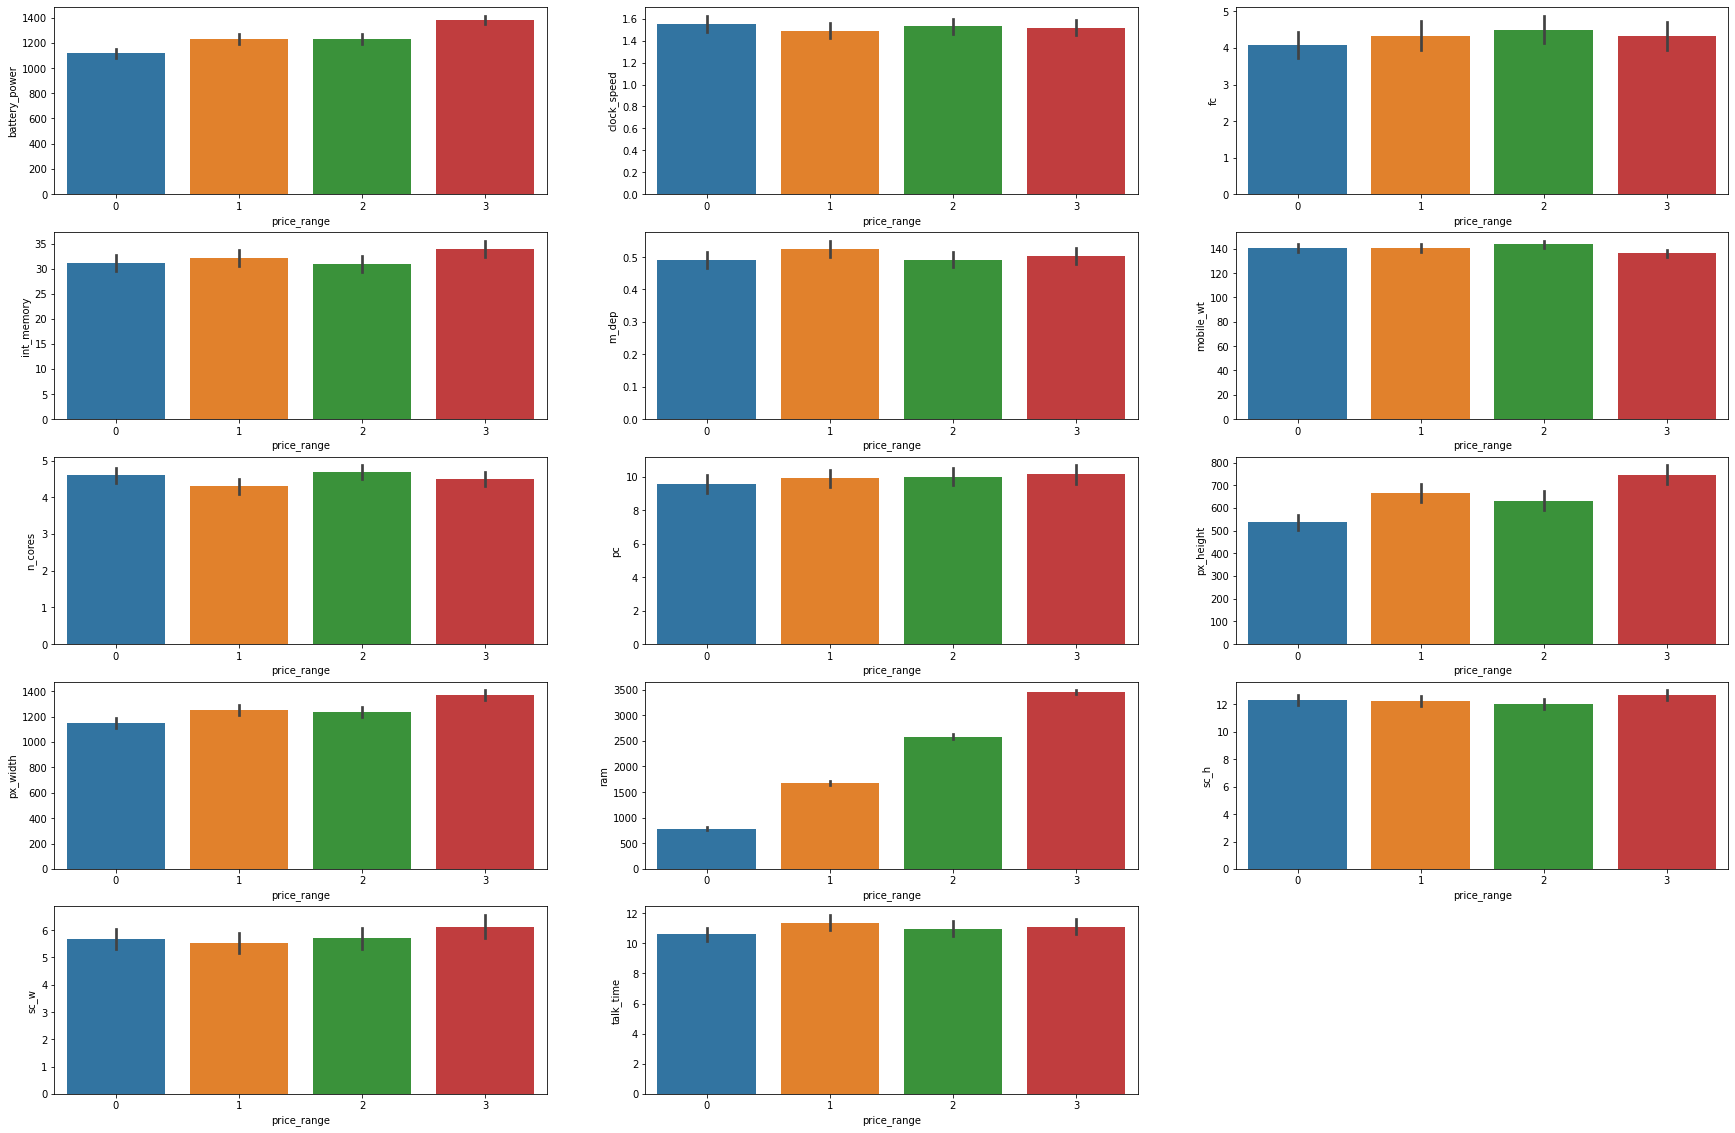

In [83]:
plt.figure(figsize=(30,20))
j = 1
for i in num_df.columns:
  plt.subplot(5,3,j)
  sns.barplot(x=df['price_range'],y=df[i])
 
  j=j+1


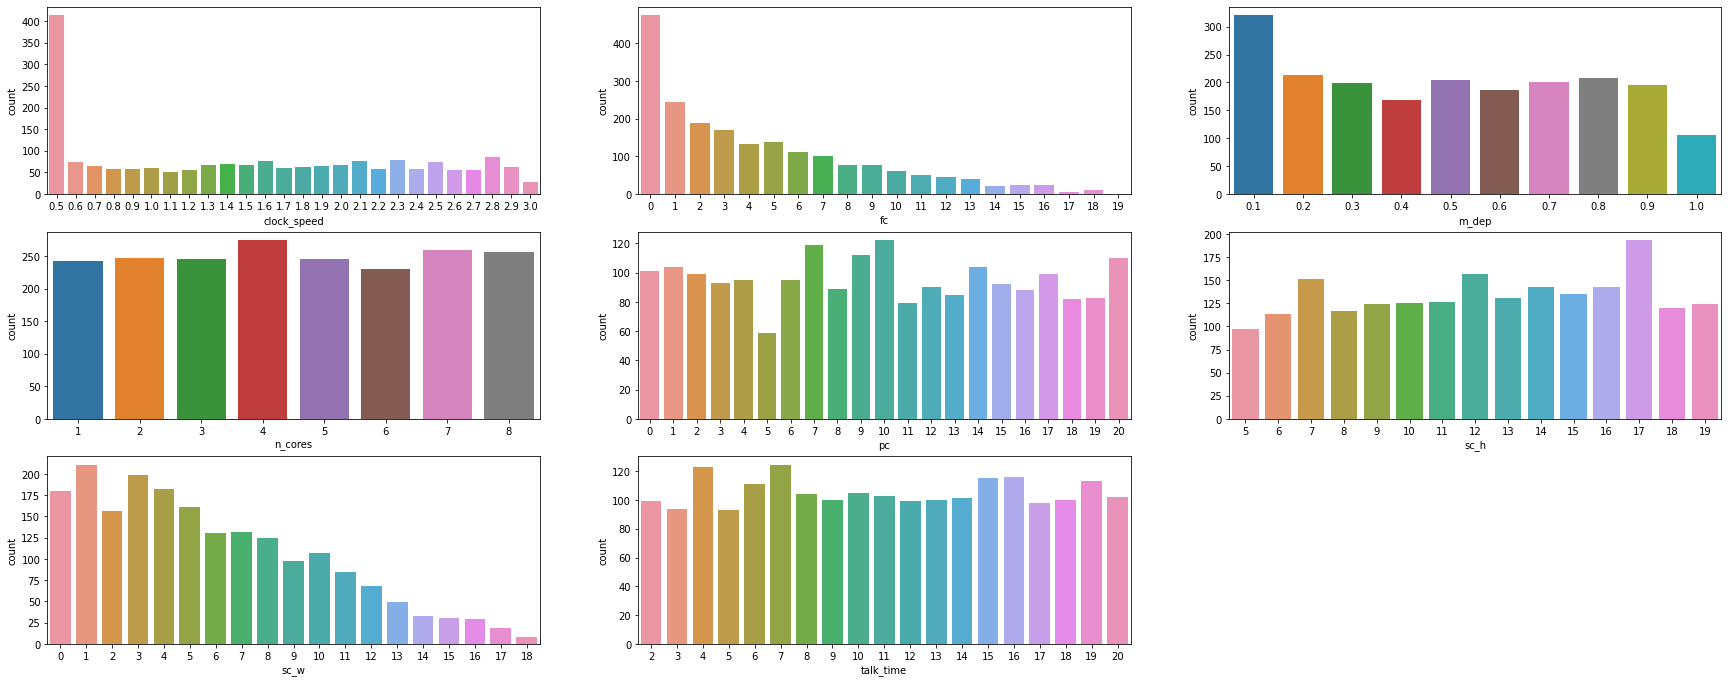

In [84]:
count_df = df[['clock_speed', 'fc','m_dep','n_cores','pc','sc_h', 'sc_w', 'talk_time']]
plt.figure(figsize=(30,20))
j = 1
for i in count_df.columns:
  plt.subplot(5,3,j)
  sns.countplot(x=df[i])
 
  j=j+1

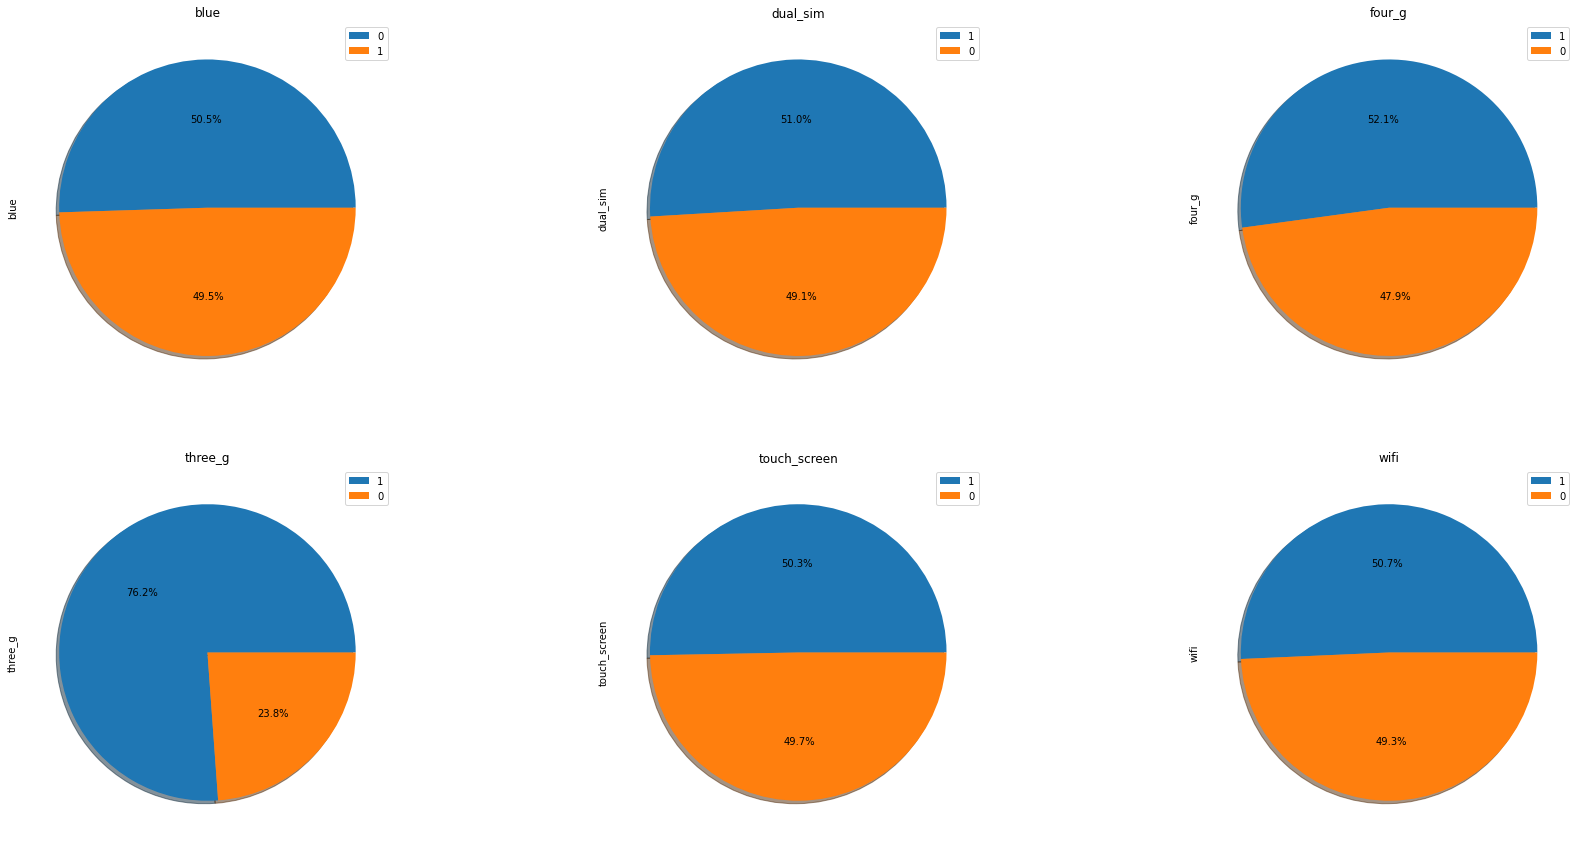

In [85]:
plt.figure(figsize=(30,15))
j=1
for i in cat_df.columns:
  plt.subplot(2, 3, j)
  j+=1
  cat_df[i].value_counts().plot.pie (autopct='%1.1f%%',shadow=True,labeldistance=None)
  plt.legend()
# plt.ylabel('')
  plt.title(i)

## **Data preprocessing**

In [86]:
X = df.drop(columns= 'price_range')
y = df['price_range'] 

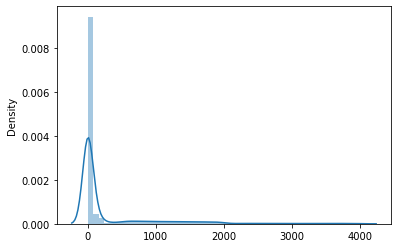

In [87]:
sns.distplot(X)

In [88]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [89]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [90]:
from sklearn.preprocessing import PowerTransformer
jhon = PowerTransformer(method='yeo-johnson')

x_transformed = jhon.fit_transform(X)

In [91]:
x_transformed

array([[-0.88210237, -0.9900495 ,  0.86485888, ..., -1.78686097,
        -1.00601811,  0.98609664],
       [-0.44331856,  1.0100505 , -1.34967629, ...,  0.55964063,
         0.99401789, -1.01409939],
       [-1.63133458,  1.0100505 , -1.34967629, ...,  0.55964063,
         0.99401789, -1.01409939],
       ...,
       [ 1.45846719, -0.9900495 , -0.70668067, ...,  0.55964063,
         0.99401789, -1.01409939],
       [ 0.65114927, -0.9900495 , -0.70668067, ...,  0.55964063,
         0.99401789,  0.98609664],
       [-1.78590061,  1.0100505 ,  0.65810309, ...,  0.55964063,
         0.99401789,  0.98609664]])

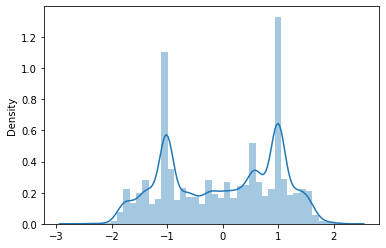

In [92]:
sns.distplot(x_transformed)

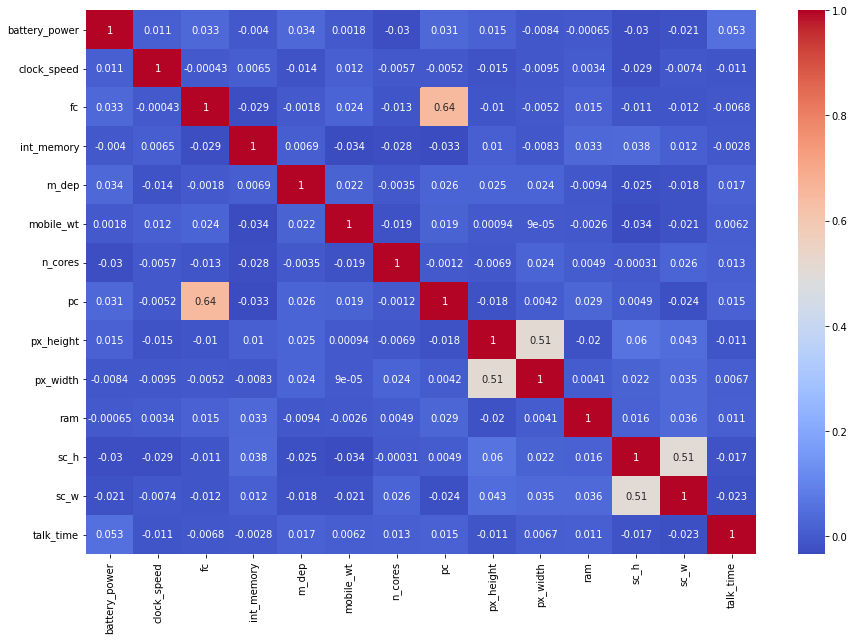

In [93]:
plt.figure(figsize=(15,10))
sns.heatmap(num_df.corr(),annot=True,cmap= 'coolwarm')

In [94]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [95]:
df1 = add_constant(num_df)

In [96]:
# VIF of dataframe x
def vif(numerical_list):
# define vif that takes argument as list of columns
  x=df1[num_df.columns]
  a=pd.Series([(variance_inflation_factor(x.values,i)) for i in range(x.shape[1])], index=x.columns)
  return (a)

In [97]:
df1.head()

,const,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,1.0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19
1,1.0,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7
2,1.0,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9
3,1.0,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11
4,1.0,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15


In [98]:
vif(num_df)

battery_power     7.953793
clock_speed       4.230906
fc                3.406797
int_memory        3.929899
m_dep             3.901351
mobile_wt        12.526344
n_cores           4.593203
pc                6.217410
px_height         4.238915
px_width         11.561984
ram               4.620178
sc_h             11.360273
sc_w              3.714106
talk_time         4.835314
dtype: float64

In [99]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x_transformed,y,test_size = 0.2, random_state = 2)

In [100]:
X_train[0]

array([ 1.08548242,  1.0100505 , -0.56166326, -1.01918398, -0.67868074,
        0.95788598, -1.47878372,  0.39018536, -0.3707394 , -0.61809796,
        1.12055844, -0.42501115,  0.2958325 , -0.79093475, -1.76256598,
       -1.77432203,  0.91281961,  0.55964063,  0.99401789,  0.98609664])

In [101]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.02083882, 0.        , 0.        , 0.        , 0.        ,
       0.01083588, 0.0043502 , 0.02144702, 0.        , 0.        ,
       0.        , 0.0297477 , 0.00401424, 0.83352691, 0.        ,
       0.03441422, 0.00432901, 0.01545076, 0.        , 0.        ])

In [102]:
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
X_train_scaled = scl.fit_transform(X_train)
X_test_scaled = scl.transform(X_test)
X_scaled = scl.transform(x_transformed)

## **ML Models**

###**KNN**

In [103]:
from sklearn.neighbors import  KNeighborsClassifier

ML(KNeighborsClassifier(n_neighbors= 60))

cv_mean_score=0.6439999999999999


[CV] START .....................................................................
[CV] END ..................., score=(train=0.702, test=0.655) total time=   0.0s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] END ..................., score=(train=0.701, test=0.620) total time=   0.1s
[CV] START .....................................................................
[CV] END ..................., score=(train=0.692, test=0.667) total time=   0.0s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.7s remaining:    0.0s


[CV] END ..................., score=(train=0.706, test=0.645) total time=   0.0s
[CV] START .....................................................................
[CV] END ..................., score=(train=0.696, test=0.632) total time=   0.0s
Cross validate scores={'fit_time': array([0.00142503, 0.00116825, 0.00165939, 0.00119281, 0.00122619]), 'score_time': array([0.03569269, 0.07754016, 0.03887415, 0.03817892, 0.03543353]), 'estimator': [KNeighborsClassifier(n_neighbors=60), KNeighborsClassifier(n_neighbors=60), KNeighborsClassifier(n_neighbors=60), KNeighborsClassifier(n_neighbors=60), KNeighborsClassifier(n_neighbors=60)], 'test_score': array([0.655 , 0.62  , 0.6675, 0.645 , 0.6325]), 'train_score': array([0.701875, 0.70125 , 0.691875, 0.70625 , 0.69625 ])}




Classification Report = 
               precision    recall  f1-score   support

           0       0.86      0.80      0.83       105
           1       0.52      0.66      0.58        87
           2       0.63      0.52  

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.0s finished


In [104]:
from sklearn.metrics import accuracy_score
accuracy =[]
for i in range(15,75):
  KNN = KNeighborsClassifier(n_neighbors= i)
  KNN.fit(X_train_scaled,y_train)
  y_pred_knn = KNN.predict(X_test_scaled)
  accuracy.append(accuracy_score(y_pred_knn,y_test))


In [105]:
print(accuracy)

[0.6175, 0.6, 0.62, 0.645, 0.6375, 0.6325, 0.635, 0.615, 0.6275, 0.625, 0.615, 0.6225, 0.61, 0.6075, 0.625, 0.615, 0.62, 0.62, 0.6325, 0.6275, 0.6125, 0.61, 0.6275, 0.64, 0.645, 0.6325, 0.6475, 0.6525, 0.66, 0.6575, 0.65, 0.655, 0.645, 0.65, 0.65, 0.65, 0.6525, 0.665, 0.6675, 0.675, 0.6775, 0.6725, 0.6725, 0.6775, 0.6725, 0.6825, 0.6675, 0.67, 0.6775, 0.6625, 0.665, 0.67, 0.6775, 0.6625, 0.66, 0.6625, 0.67, 0.68, 0.68, 0.68]


#### **Accuracy graph for different parameters of KNN**

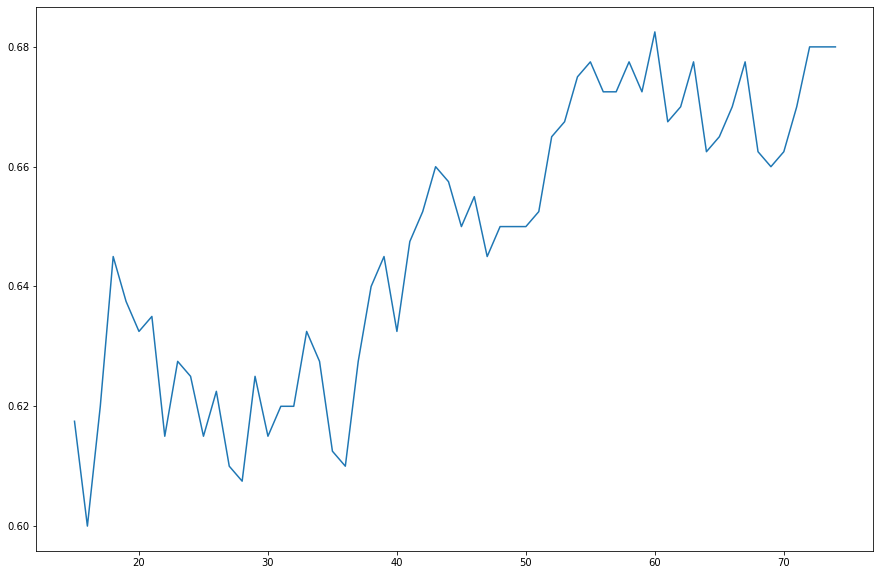

In [106]:
plt.figure(figsize=(15,10))
plt.plot(range(15,75),accuracy)

###**Support Vector Machine** 

In [107]:
from sklearn.svm import SVC
ML(SVC())

cv_mean_score=0.8775000000000001


[CV] START .....................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ..................., score=(train=0.984, test=0.882) total time=   0.2s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] END ..................., score=(train=0.984, test=0.853) total time=   0.3s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


[CV] END ..................., score=(train=0.986, test=0.912) total time=   0.4s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.7s remaining:    0.0s


[CV] END ..................., score=(train=0.988, test=0.868) total time=   0.4s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.5s remaining:    0.0s


[CV] END ..................., score=(train=0.983, test=0.873) total time=   0.4s
Cross validate scores={'fit_time': array([0.14443827, 0.25108862, 0.30699396, 0.27557659, 0.28987145]), 'score_time': array([0.04059911, 0.06375766, 0.09026384, 0.0746758 , 0.12735057]), 'estimator': [SVC(), SVC(), SVC(), SVC(), SVC()], 'test_score': array([0.8825, 0.8525, 0.9125, 0.8675, 0.8725]), 'train_score': array([0.984375, 0.98375 , 0.98625 , 0.9875  , 0.9825  ])}




Classification Report = 
               precision    recall  f1-score   support

           0       0.96      0.95      0.95        99
           1       0.85      0.88      0.87       106
           2       0.83      0.80      0.82        97
           3       0.92      0.93      0.92        98

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400



[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.1s finished


#### Hyperparameter tunning for SVC

In [108]:
# parameter for Support Vector Classifier
svc_params = {'C':range(5,10,2),
              'kernel':['rbf','linear', 'poly', 'sigmoid',]}
# After finding the best parameters, we commented on all the other parameters for faster execution

In [109]:
svc_grid = GridSearchCV(SVC(),param_grid=svc_params,cv=5,verbose=True,scoring='accuracy',n_jobs=-1)
svc_grid.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': range(5, 10, 2),
                         'kernel': ['rbf', 'linear', 'poly', 'sigmoid']},
             scoring='accuracy', verbose=True)

In [110]:
svc_grid.best_params_

{'C': 5, 'kernel': 'linear'}

In [111]:
ML(SVC(C= 5, kernel= 'linear'))

cv_mean_score=0.9540000000000001


[CV] START .....................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ..................., score=(train=0.969, test=0.960) total time=   0.2s
[CV] START .....................................................................
[CV] END ..................., score=(train=0.971, test=0.955) total time=   0.1s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV] END ..................., score=(train=0.974, test=0.950) total time=   0.3s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.7s remaining:    0.0s


[CV] END ..................., score=(train=0.971, test=0.953) total time=   0.2s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.9s remaining:    0.0s


[CV] END ..................., score=(train=0.970, test=0.953) total time=   0.2s
Cross validate scores={'fit_time': array([0.16961026, 0.12854266, 0.24821305, 0.22744513, 0.19182944]), 'score_time': array([0.00629354, 0.00723553, 0.01307106, 0.00581551, 0.00604725]), 'estimator': [SVC(C=5, kernel='linear'), SVC(C=5, kernel='linear'), SVC(C=5, kernel='linear'), SVC(C=5, kernel='linear'), SVC(C=5, kernel='linear')], 'test_score': array([0.96  , 0.955 , 0.95  , 0.9525, 0.9525]), 'train_score': array([0.96875 , 0.97125 , 0.974375, 0.97125 , 0.97    ])}




Classification Report = 
               precision    recall  f1-score   support

           0       0.99      0.92      0.96       105
           1       0.91      0.99      0.95       100
           2       0.97      0.96      0.96        95
           3       0.98      0.97      0.97       100

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96  

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.2s finished


### **Decision Tree**

In [112]:
from sklearn.tree import DecisionTreeClassifier
ML(DecisionTreeClassifier())

cv_mean_score=0.8300000000000001


[CV] START .....................................................................
[CV] END ..................., score=(train=1.000, test=0.845) total time=   0.0s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] END ..................., score=(train=1.000, test=0.818) total time=   0.0s
[CV] START .....................................................................
[CV] END ..................., score=(train=1.000, test=0.812) total time=   0.0s
[CV] START .....................................................................
[CV] END ..................., score=(train=1.000, test=0.830) total time=   0.0s
[CV] START .....................................................................
[CV] END ..................., score=(train=1.000, test=0.815) total time=   0.0s
Cross validate scores={'fit_time': array([0.01719117, 0.02709126, 0.01639366, 0.01639795, 0.01671505]), 'score_time': array([0.00078773, 0.00087142, 0.0007422 , 0.00070977, 0.00055337]), 'estimator': [DecisionTreeClassifier(), DecisionTreeClassifier(), DecisionTreeClassifier(), DecisionTreeClassifier(), DecisionTreeClassifier()], 'test_score': array([0.845 , 0.8175, 0.8125, 0.83  , 0.815 ]), 'train_score': array([1., 1., 1., 1., 

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


In [113]:
#confusion_matrix(y_pred, y_test)

#### **Feature selection for Decision Tree**

[Text(0.5, 1.0, 'Top 10 Important features for DecisionTreeClassifier()')]

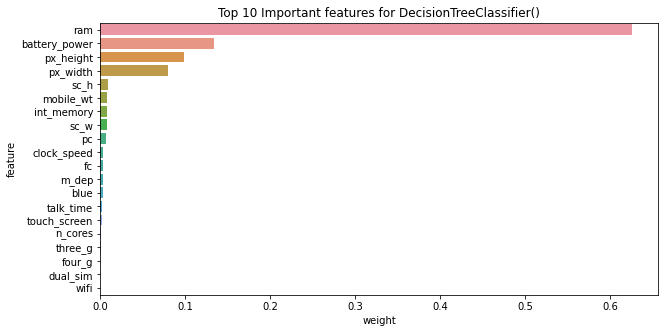

In [114]:
DT = DecisionTreeClassifier()
DT.fit(X_train,y_train)
df5=pd.DataFrame({"feature":X.columns,"weight":DT.feature_importances_}).sort_values('weight',ascending=False).head(20)

plt.figure(figsize=(10,5))
    
sns.barplot(x=df5.weight,y=df5.feature).set(title=f'Top 10 Important features for {DT}')

#### **Hyperparameter tunning for decision tree**

In [115]:
# Hyperparameter Tunning
# parameter = {'criterion' :['gini', 'entropy'],
#              'splitter' :['best', 'random'],
#              'max_depth' : [10,15,20,25,30,35,40,45,50,55,None],
#              'min_samples_split' : [3,2,4,5,10,15,25,30],
#              'min_samples_leaf' : [3,5,8,10,12],
#              }
# DT_tunning = GridSearchCV(DT,parameter,cv=5,n_jobs=-1)
# DT_tunning.fit(X_train,y_train)


In [116]:
# Best Params
# DT_tunning.best_params_

In [117]:
ML(DecisionTreeClassifier(criterion =  'entropy',max_depth= 45,min_samples_leaf= 5,min_samples_split= 10,splitter= 'best' ))


cv_mean_score=0.849


[CV] START .....................................................................
[CV] END ..................., score=(train=0.961, test=0.855) total time=   0.1s
[CV] START .....................................................................
[CV] END ..................., score=(train=0.953, test=0.848) total time=   0.1s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] END ..................., score=(train=0.953, test=0.848) total time=   0.0s
[CV] START .....................................................................
[CV] END ..................., score=(train=0.957, test=0.823) total time=   0.0s
[CV] START .....................................................................
[CV] END ..................., score=(train=0.953, test=0.850) total time=   0.0s
Cross validate scores={'fit_time': array([0.06491423, 0.06269455, 0.03522158, 0.03193259, 0.02222681]), 'score_time': array([0.00099182, 0.0098331 , 0.00073028, 0.0070188 , 0.00075793]), 'estimator': [DecisionTreeClassifier(criterion='entropy', max_depth=45, min_samples_leaf=5,
                       min_samples_split=10), DecisionTreeClassifier(criterion='entropy', max_depth=45, min_samples_leaf=5,
                       min_samples_split=10), DecisionTreeClassifier(criterion='entropy', max_depth=45, min_samples_leaf=5,
                       min_samples_split=10), DecisionTreeClassifier

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished


### **Bagging**

In [118]:
from sklearn.ensemble  import  BaggingClassifier
ML(BaggingClassifier())

cv_mean_score=0.882


[CV] START .....................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ..................., score=(train=0.994, test=0.877) total time=   0.2s
[CV] START .....................................................................
[CV] END ..................., score=(train=0.992, test=0.868) total time=   0.2s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV] END ..................., score=(train=0.992, test=0.895) total time=   0.2s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.6s remaining:    0.0s


[CV] END ..................., score=(train=0.994, test=0.875) total time=   0.2s
[CV] START .....................................................................
[CV] END ..................., score=(train=0.993, test=0.865) total time=   0.1s
Cross validate scores={'fit_time': array([0.2061758 , 0.17684865, 0.15361643, 0.19082832, 0.13541985]), 'score_time': array([0.01696324, 0.00411296, 0.00402403, 0.02272844, 0.00451732]), 'estimator': [BaggingClassifier(), BaggingClassifier(), BaggingClassifier(), BaggingClassifier(), BaggingClassifier()], 'test_score': array([0.8775, 0.8675, 0.895 , 0.875 , 0.865 ]), 'train_score': array([0.994375, 0.991875, 0.991875, 0.994375, 0.993125])}




Classification Report = 
               precision    recall  f1-score   support

           0       0.97      0.86      0.91       110
           1       0.82      0.92      0.86        97
           2       0.85      0.86      0.86        93
           3       0.92      0.91      0.91       100

    accurac

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.0s finished


#### **Hyperparameter tunning for Bagging**

In [119]:
# BC = BaggingClassifier()
# LR = LogisticRegression()
# GBC = GradientBoostingClassifier()
# RFC = RandomForestClassifier()

# params = {'base_estimator':[LR,GBC,RFC], 'n_estimators' : [20,50,100], 'max_samples' : [0.2,0.5,0.8,1.0],
#           'bootstrap': [True,False],'bootstrap_features': [True,False], 'max_features':[0.2,0.5,0.7,1.0]}

# Bagging_tunning = RandomizedSearchCV(BaggingClassifier(n_jobs=-1),params,cv=5,n_jobs=-1) 
# Bagging_tunning.fit(X_train,y_train)          
# Bagging_tunning.best_params_     

In [120]:
ML(BaggingClassifier(base_estimator= LogisticRegression(),
 bootstrap= True,
 bootstrap_features= True,
 max_features= 1.0,
 max_samples= 0.8,
 n_estimators= 20))

cv_mean_score=0.917


[CV] START .....................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ..................., score=(train=0.951, test=0.940) total time=   1.6s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV] END ..................., score=(train=0.947, test=0.920) total time=   1.5s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.1s remaining:    0.0s


[CV] END ..................., score=(train=0.919, test=0.917) total time=   1.2s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.3s remaining:    0.0s


[CV] END ..................., score=(train=0.939, test=0.925) total time=   0.8s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.1s remaining:    0.0s


[CV] END ..................., score=(train=0.930, test=0.930) total time=   0.7s
Cross validate scores={'fit_time': array([1.55084634, 1.50035524, 1.16331053, 0.80179524, 0.73705125]), 'score_time': array([0.0159719 , 0.00994253, 0.0054369 , 0.00852799, 0.00531054]), 'estimator': [BaggingClassifier(base_estimator=LogisticRegression(), bootstrap_features=True,
                  max_samples=0.8, n_estimators=20), BaggingClassifier(base_estimator=LogisticRegression(), bootstrap_features=True,
                  max_samples=0.8, n_estimators=20), BaggingClassifier(base_estimator=LogisticRegression(), bootstrap_features=True,
                  max_samples=0.8, n_estimators=20), BaggingClassifier(base_estimator=LogisticRegression(), bootstrap_features=True,
                  max_samples=0.8, n_estimators=20), BaggingClassifier(base_estimator=LogisticRegression(), bootstrap_features=True,
                  max_samples=0.8, n_estimators=20)], 'test_score': array([0.94  , 0.92  , 0.9175, 0.925 ,

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.9s finished


### **Random Forest**

In [121]:
from sklearn.ensemble import RandomForestClassifier
ML(RandomForestClassifier())

cv_mean_score=0.8729999999999999


[CV] START .....................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ..................., score=(train=1.000, test=0.863) total time=   0.4s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] END ..................., score=(train=1.000, test=0.873) total time=   0.4s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s


[CV] END ..................., score=(train=1.000, test=0.895) total time=   0.4s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.3s remaining:    0.0s


[CV] END ..................., score=(train=1.000, test=0.858) total time=   0.4s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.8s remaining:    0.0s


[CV] END ..................., score=(train=1.000, test=0.865) total time=   0.4s
Cross validate scores={'fit_time': array([0.37018991, 0.37591767, 0.36427355, 0.38803172, 0.36988425]), 'score_time': array([0.01986051, 0.02481031, 0.01981354, 0.01949644, 0.01936555]), 'estimator': [RandomForestClassifier(), RandomForestClassifier(), RandomForestClassifier(), RandomForestClassifier(), RandomForestClassifier()], 'test_score': array([0.8625, 0.8725, 0.895 , 0.8575, 0.865 ]), 'train_score': array([1., 1., 1., 1., 1.])}




Classification Report = 
               precision    recall  f1-score   support

           0       0.97      0.89      0.93       107
           1       0.83      0.90      0.86       100
           2       0.82      0.88      0.85        88
           3       0.96      0.90      0.93       105

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.89      0.89       400



[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.2s finished


### **Gradient Boosting**

In [122]:
from sklearn.ensemble import GradientBoostingClassifier
ML(GradientBoostingClassifier())

cv_mean_score=0.9025000000000001


[CV] START .....................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ..................., score=(train=1.000, test=0.895) total time=   2.2s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s


[CV] END ..................., score=(train=1.000, test=0.915) total time=   2.2s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.4s remaining:    0.0s


[CV] END ..................., score=(train=0.999, test=0.900) total time=   2.2s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.6s remaining:    0.0s


[CV] END ..................., score=(train=1.000, test=0.902) total time=   2.2s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    8.8s remaining:    0.0s


[CV] END ..................., score=(train=1.000, test=0.885) total time=   2.2s
Cross validate scores={'fit_time': array([2.18147564, 2.18804073, 2.16434717, 2.1893363 , 2.21889329]), 'score_time': array([0.00489688, 0.00465298, 0.00532675, 0.00453949, 0.00447989]), 'estimator': [GradientBoostingClassifier(), GradientBoostingClassifier(), GradientBoostingClassifier(), GradientBoostingClassifier(), GradientBoostingClassifier()], 'test_score': array([0.895 , 0.915 , 0.9   , 0.9025, 0.885 ]), 'train_score': array([1.     , 1.     , 0.99875, 1.     , 1.     ])}




Classification Report = 
               precision    recall  f1-score   support

           0       0.96      0.90      0.93       105
           1       0.89      0.92      0.90       106
           2       0.90      0.92      0.91        92
           3       0.94      0.96      0.95        97

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92  

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   11.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   11.1s finished


###**XGBoost**

In [129]:
!pip3 install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [130]:
import xgboost

In [131]:
from xgboost import XGBClassifier

ML(XGBClassifier())


cv_mean_score=0.9045


[CV] START .....................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ..................., score=(train=0.987, test=0.897) total time=   0.8s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV] END ..................., score=(train=0.990, test=0.915) total time=   0.9s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.7s remaining:    0.0s


[CV] END ..................., score=(train=0.988, test=0.915) total time=   0.9s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.6s remaining:    0.0s


[CV] END ..................., score=(train=0.986, test=0.905) total time=   1.1s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.8s remaining:    0.0s


[CV] END ..................., score=(train=0.990, test=0.890) total time=   1.1s
Cross validate scores={'fit_time': array([0.74255991, 0.87580013, 0.87563062, 1.12568903, 1.0816102 ]), 'score_time': array([0.0150044 , 0.00756836, 0.00751328, 0.00758147, 0.00772572]), 'estimator': [XGBClassifier(objective='multi:softprob'), XGBClassifier(objective='multi:softprob'), XGBClassifier(objective='multi:softprob'), XGBClassifier(objective='multi:softprob'), XGBClassifier(objective='multi:softprob')], 'test_score': array([0.8975, 0.915 , 0.915 , 0.905 , 0.89  ]), 'train_score': array([0.986875, 0.99    , 0.988125, 0.98625 , 0.99    ])}




Classification Report = 
               precision    recall  f1-score   support

           0       0.95      0.89      0.92       104
           1       0.87      0.90      0.88       106
           2       0.89      0.89      0.89        94
           3       0.93      0.96      0.94        96

    accuracy                           0.91       400
   macro 

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.9s finished


#### **Hyperparameter tunning for XGBoost**

In [ ]:
## Hyper Parameter Optimization

# params={
#  "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
#  "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
#  "min_child_weight" : [ 1, 3, 5, 7 ],
#  "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
#  "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
# }

In [ ]:
XGB = xgboost.XGBClassifier()

In [ ]:
#XGB = XGBClassifier()
# random_search= RandomizedSearchCV(XGB,param_distributions=params,n_iter=5,scoring='accuracy',n_jobs=-1,cv=5,verbose=3)
# random_search.fit(X_train,y_train)

In [ ]:
# random_search.best_params_

In [ ]:
# random_search.best_estimator_

In [133]:
ML(XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7, gamma=0.3, learning_rate=0.25,
       max_delta_step=0, max_depth=15, min_child_weight=3, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1))

cv_mean_score=0.8949999999999999


[CV] START .....................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ..................., score=(train=1.000, test=0.897) total time=   1.5s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


[CV] END ..................., score=(train=1.000, test=0.900) total time=   0.9s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.4s remaining:    0.0s


[CV] END ..................., score=(train=1.000, test=0.897) total time=   0.9s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.3s remaining:    0.0s


[CV] END ..................., score=(train=1.000, test=0.900) total time=   0.9s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.3s remaining:    0.0s


[CV] END ..................., score=(train=1.000, test=0.880) total time=   0.9s
Cross validate scores={'fit_time': array([1.45283699, 0.8992312 , 0.89974928, 0.88903832, 0.90418863]), 'score_time': array([0.00570393, 0.00604177, 0.00614953, 0.00585938, 0.00606751]), 'estimator': [XGBClassifier(colsample_bytree=0.7, gamma=0.3, learning_rate=0.25, max_depth=15,
              min_child_weight=3, objective='multi:softprob', silent=True), XGBClassifier(colsample_bytree=0.7, gamma=0.3, learning_rate=0.25, max_depth=15,
              min_child_weight=3, objective='multi:softprob', silent=True), XGBClassifier(colsample_bytree=0.7, gamma=0.3, learning_rate=0.25, max_depth=15,
              min_child_weight=3, objective='multi:softprob', silent=True), XGBClassifier(colsample_bytree=0.7, gamma=0.3, learning_rate=0.25, max_depth=15,
              min_child_weight=3, objective='multi:softprob', silent=True), XGBClassifier(colsample_bytree=0.7, gamma=0.3, learning_rate=0.25, max_depth=15,
         

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.2s finished


###**Voting**

In [123]:
# Base Estimators 
estimators = [('DT',DecisionTreeClassifier()),('RF',RandomForestClassifier()),
       ('GB',GradientBoostingClassifier()),('LR',LogisticRegression()),
       ]

In [128]:
from sklearn.ensemble  import  VotingClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.svm import SVC
dt=DecisionTreeClassifier(criterion =  'entropy',max_depth= 45,min_samples_leaf= 5,min_samples_split= 10,splitter= 'best' )
xgb = XGBClassifier
sc = StackingClassifier(estimators=estimators,final_estimator=SVC,passthrough=True,n_jobs=-1)
gbc=GradientBoostingClassifier()
xbg_ = XGBClassifier(colsample_bytree= 0.7,
 gamma= 0.3,
 learning_rate= 0.25,
 max_depth= 15,
 min_child_weight= 3,
 objective='multi:softprob')
bc = BaggingClassifier(base_estimator= LogisticRegression(),
 bootstrap= True,
 bootstrap_features= True,
 max_features= 1.0,
 max_samples= 0.8,
 n_estimators= 20)
estimator=[('gbc',gbc),('bc',bc),('dt',dt)]

ML(VotingClassifier(estimators=estimator))

cv_mean_score=0.9195


[CV] START .....................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ..................., score=(train=0.986, test=0.910) total time=   2.9s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s


[CV] END ..................., score=(train=0.987, test=0.925) total time=   2.9s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.8s remaining:    0.0s


[CV] END ..................., score=(train=0.991, test=0.915) total time=   2.9s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    8.7s remaining:    0.0s


[CV] END ..................., score=(train=0.990, test=0.930) total time=   4.6s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   13.4s remaining:    0.0s


[CV] END ..................., score=(train=0.990, test=0.922) total time=   3.0s
Cross validate scores={'fit_time': array([2.83940721, 2.87950683, 2.86944103, 4.57229757, 2.96768737]), 'score_time': array([0.01227474, 0.0125761 , 0.01422   , 0.01352262, 0.01229048]), 'estimator': [VotingClassifier(estimators=[('gbc', GradientBoostingClassifier()),
                             ('bc',
                              BaggingClassifier(base_estimator=LogisticRegression(),
                                                bootstrap_features=True,
                                                max_samples=0.8,
                                                n_estimators=20)),
                             ('dt',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=45,
                                                     min_samples_leaf=5,
                                                     min_samples_split=10)

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   16.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   16.4s finished


#### **Hyperparameter tunning for Voting**

In [ ]:
# hyperparameter tunning of voting

# from sklearn.model_selection import cross_val_score
# for i in range(1,5):
#   for j in range(1,5):
#     for k in range(1,5):
#       for l in range(1,5):
#       # mean cross_val_score for Voting
#        vr=VotingClassifier(estimators=estimator,weights=[i,j,k,l])
#        score = cross_val_score(vr,x_transformed,df['price_range'],scoring='accuracy',cv= 10)
#        print(f'for ({i},{j},{k},{l}) vr mean_cv_score={np.mean(score)}')

### **Stacking**

In [51]:
# import stacking regressor from sklearn ensemble
from sklearn.ensemble import StackingClassifier

In [56]:
#Base Estimators 
estimators = [('gbc',GradientBoostingClassifier()),('xgb',XGBClassifier(colsample_bytree=0.7, gamma=0.3, learning_rate=0.25, max_depth=15,
              min_child_weight=3, objective='multi:softprob')),
       ('bc',BaggingClassifier(base_estimator= SVC(C= 5, kernel= 'linear'),
 bootstrap= True,
 bootstrap_features= True,
 max_features= 1.0,
 max_samples= 0.8,
 n_estimators= 20))]


# Stacking
ML(StackingClassifier(estimators=estimators,final_estimator=lR,passthrough=True,n_jobs=-1))
    

cv_mean_score=0.953


[CV] START .....................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ..................., score=(train=0.996, test=0.948) total time=  27.1s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   27.7s remaining:    0.0s


[CV] END ..................., score=(train=0.993, test=0.938) total time=  26.3s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   54.4s remaining:    0.0s


[CV] END ..................., score=(train=0.998, test=0.948) total time=  38.8s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.6min remaining:    0.0s


[CV] END ..................., score=(train=0.998, test=0.945) total time=  37.0s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  2.2min remaining:    0.0s


[CV] END ..................., score=(train=0.999, test=0.935) total time=  26.2s
Cross validate scores={'fit_time': array([26.95487452, 26.16253519, 38.65897775, 36.88260031, 26.10559702]), 'score_time': array([0.14321852, 0.12304592, 0.13822126, 0.12304211, 0.12307882]), 'estimator': [StackingClassifier(estimators=[('gbc', GradientBoostingClassifier()),
                               ('xgb',
                                XGBClassifier(colsample_bytree=0.7, gamma=0.3,
                                              learning_rate=0.25, max_depth=15,
                                              min_child_weight=3,
                                              objective='multi:softprob')),
                               ('bc',
                                BaggingClassifier(base_estimator=SVC(C=5,
                                                                     kernel='linear'),
                                                  bootstrap_features=True,
                             

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.6min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.6min finished


 Out of all the models, Stacking Classifier performs the best with **95** CV_mean_score and **96%** accuracy.